In [21]:
import pandas as pd
import os
from scipy import stats
import numpy as np
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
raw = '../data/raw/'

In [3]:
train = pd.read_csv(raw + 'train.csv')

/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2683: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


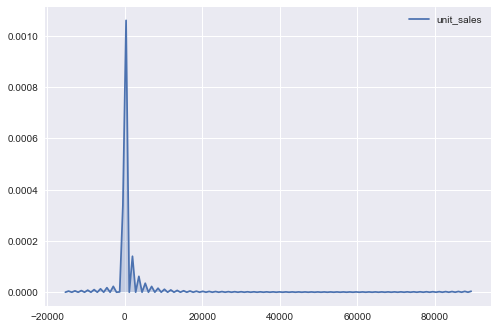

In [5]:
sb.kdeplot(train['unit_sales'], shade=True)

In [6]:
#split the data into quartiles of unit sales
train.describe()

#display pdf for each

,id,store_nbr,item_nbr,unit_sales
count,1.254970e+08,1.254970e+08,1.254970e+08,1.254970e+08
mean,6.274852e+07,2.746458e+01,9.727692e+05,8.554865e+00
std,3.622788e+07,1.633051e+01,5.205336e+05,2.360515e+01
min,0.000000e+00,1.000000e+00,9.699500e+04,-1.537200e+04
25%,3.137426e+07,1.200000e+01,5.223830e+05,2.000000e+00
50%,6.274852e+07,2.800000e+01,9.595000e+05,4.000000e+00
75%,9.412278e+07,4.300000e+01,1.354380e+06,9.000000e+00
max,1.254970e+08,5.400000e+01,2.127114e+06,8.944000e+04


In [ ]:
panel1 = train[train['unit_sales'] <= -2000]
temp = train[train['unit_sales'] <= 2000]
panel2 = temp[temp['unit_sales'] >= -2000]

In [40]:
temp = train[train['unit_sales'] <= 25]
panel3 = temp[temp['unit_sales'] >= -5]

In [46]:
panel4 = train[train['unit_sales'] >= 2000]

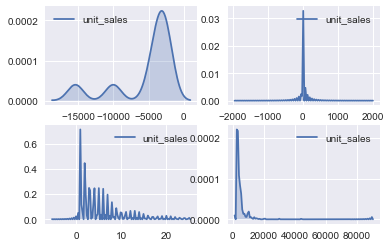

In [47]:
f, ax = plt.subplots(2,2)
sb.kdeplot(panel1['unit_sales'], shade=True, ax = ax[0][0])
sb.kdeplot(panel2['unit_sales'], shade=True, ax = ax[0][1])
sb.kdeplot(panel3['unit_sales'], shade=True, ax = ax[1][0])
sb.kdeplot(panel4['unit_sales'], shade=True, ax = ax[1][1])

In [48]:
panel4.describe()

,id,store_nbr,item_nbr,unit_sales
count,9.290000e+02,929.000000,9.290000e+02,929.000000
mean,7.454687e+07,33.168999,9.960798e+05,3662.873943
std,3.725080e+07,14.679568,5.757317e+05,3938.215255
min,2.574670e+05,1.000000,1.055740e+05,2000.000000
25%,4.459171e+07,21.000000,4.575740e+05,2298.000000
50%,7.747190e+07,38.000000,1.012787e+06,2717.000000
75%,1.082881e+08,45.000000,1.309297e+06,3713.000000
max,1.254655e+08,54.000000,2.084557e+06,89440.000000


In [5]:
items = pd.read_csv(raw + 'items.csv')

In [6]:
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [7]:
np.unique(items.family)

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD'], dtype=object)

In [9]:
holidays = pd.read_csv(raw + 'holidays_events.csv')

In [10]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [11]:
oil = pd.read_csv(raw + 'oil.csv')

In [12]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [13]:
stores = pd.read_csv(raw + 'stores.csv')

In [14]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [15]:
transactions = pd.read_csv(raw + 'transactions.csv')

In [16]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
